In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Natural Language Processing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data

In [2]:
# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Corpus

In [6]:
import re
re.sub('[^a-zA-Z]', ' ', dataset['Review'][0])

'Wow    Loved this place '

In [7]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Bag of words

In [135]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [136]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [137]:
X_train.shape

(800, 500)

## Naive Bayes Classifier

In [138]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [139]:
# Predicting the Test set results
y_pred = nb.predict(X_test)

In [140]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52 45]
 [ 8 95]]


## Neural Network Classifier

In [141]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [151]:
# Initialising the ANN
layer0 =  int(X_train.shape[1])
layer1 = int(X_train.shape[1]/128)
#layer2 = int(X_train.shape[1]/16)
#layer3 = int(X_train.shape[1]/64)

cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = layer1, init = 'uniform', activation = 'sigmoid', input_dim = layer0))

# Adding layers
#cnn.add(Dense(output_dim = layer2, init = 'uniform', activation = 'sigmoid'))
#cnn.add(Dense(output_dim = layer3, init = 'uniform', activation = 'relu'))
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=500, units=3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [152]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 20, validation_data=(X_test, y_test))

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 1s 862us/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4850
Epoch 2/20
800/800 [==============================] - 0s 322us/step - loss: 0.6927 - accuracy: 0.5038 - val_loss: 0.6930 - val_accuracy: 0.4850
Epoch 3/20
800/800 [==============================] - 0s 330us/step - loss: 0.6920 - accuracy: 0.5125 - val_loss: 0.6922 - val_accuracy: 0.4850
Epoch 4/20
800/800 [==============================] - 0s 320us/step - loss: 0.6906 - accuracy: 0.5038 - val_loss: 0.6911 - val_accuracy: 0.4900
Epoch 5/20
800/800 [==============================] - 0s 376us/step - loss: 0.6880 - accuracy: 0.5387 - val_loss: 0.6892 - val_accuracy: 0.5100
Epoch 6/20
800/800 [==============================] - 0s 351us/step - loss: 0.6839 - accuracy: 0.5512 - val_loss: 0.6859 - val_accuracy: 0.5300
Epoch 7/20
800/800 [==============================] - 0s 333us/step - loss: 0.6775 - accur

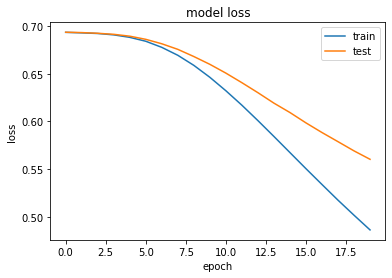

In [153]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [154]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [155]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[83 14]
 [35 68]]
